# Project-1 (Regression)
## Credit Card Spend Prediction & Identifying Key Drivers
#### By Nitin Rana - rnitin25@gmail.com

In [1]:
# import packages 

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.special import inv_boxcox
import itertools
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

#These will help you to see all records as well as columns in the data set
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE,f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# regression
import statsmodels.formula.api as smp
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [3]:
#import data 
data = pd.read_excel("E:/BA 360/Case Studies & Assignments/Python Projects/1. Predicting Credit Card Spend & Identifying Key Drivers/Data Set.xlsx")

In [4]:
#SEPARATING DATA AS PER DATA DICTIONARY

cat_cols = ['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','empcat','retire','inccat',
            'default','jobsat','marital','spousedcat','homeown','hometype','addresscat','carown','cartype','carcatvalue',
            'carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus',
            'commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason','polview',
            'polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenurecat','card2','card2type',
            'card2benefit','card2fee','card2tenurecat','active','bfast','churn','tollfree','equip','callcard','wireless',
            'multline','voice','pager','internet','callid','callwait','forward','confer','ebill','owntv','ownvcr','owndvd',
            'owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02','response_03']

num_cols = ['custid','age','ed','employ','income','lninc','debtinc','creddebt','lncreddebt','othdebt','lnothdebt','spoused',
            'reside','pets','pets_cats','pets_dogs','pets_birds','pets_reptiles','pets_small','pets_saltfish','pets_freshfish',
            'address','cars','carvalue','commutetime','cardtenure','card2tenure','cardspent','card2spent','tenure','longmon',
            'lnlongmon','longten','lnlongten','tollmon','lntollmon','tollten','lntollten','equipmon','lnequipmon','equipten',
            'lnequipten','cardmon','lncardmon','cardten','lncardten','wiremon','lnwiremon','wireten','lnwireten','hourstv']

data_cat = data[cat_cols]
data_num = data[num_cols]

In [42]:
[i for i in (data.columns)]

['custid',
 'region',
 'townsize',
 'gender',
 'age',
 'agecat',
 'birthmonth',
 'ed',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'income',
 'lninc',
 'inccat',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'default',
 'jobsat',
 'marital',
 'spoused',
 'spousedcat',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carvalue',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutetime',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'car

In [5]:
data.shape, data_cat.shape, data_num.shape

((5000, 130), (5000, 79), (5000, 51))

In [6]:
# removing log columns from the numeric data
log_cols = ['lninc','lncreddebt','lnothdebt','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon',
            'lnequipten','lncardmon','lncardten','lnwiremon','lnwireten']
data_num.drop(columns=log_cols , axis=1 , inplace = True)

# some categorical columns are already in the numerical form, concatenate those with numerical data
#numeric_cat_cols = ['gender','union','retire','default','marital','homeown','carbuy','commutecar','commutemotorcycle',
#                    'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor',
#                    'telecommute','polparty','polcontrib','vote','cardfee','card2fee','active','churn','tollfree','equip',
#                    'callcard','wireless','multline','voice','pager','callid','callwait','forward','confer','ebill','owntv',
#                    'ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
#                    'response_03']

#data_num = pd.concat([data_num, data_cat[numeric_cat_cols]],axis = 1)#
#data_cat = data_cat[data_cat.columns.difference(numeric_cat_cols)]



In [7]:
# creating total_spend column as target variable
data_num['total_spend'] = data_num.cardspent + data_num.card2spent

In [8]:
# removing custid from numerical dataset
data_num.drop(columns=['custid','cardspent','card2spent'], axis = 1, inplace = True)
data_cat.drop(columns= 'birthmonth',axis = 1, inplace = True)  # birthmonth removing from categorical dataset

In [9]:
data_num.shape,data_cat.shape

((5000, 36), (5000, 78))

## Univariate Analysis

In [10]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(),
                      x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),
                      x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95),
                      x.dropna().quantile(0.99),x.max(),x.skew(),x.kurtosis()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,
                         'P75' ,'P90' ,'P95' ,'P99' ,'MAX','skewness','kurtosis'])

num_summary=data_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX,skewness,kurtosis
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.00,18.000000,20.000000,23.000000,31.000000,47.000000,62.00000,72.000000,76.000000,79.000000,79.000000,0.090760,-1.187030
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.00,8.000000,9.000000,10.000000,12.000000,14.000000,17.00000,19.000000,20.000000,21.000000,23.000000,0.003734,-0.607063
employ,5000.0,0.0,4.865200e+04,9.730400,7.000000,9.690929,9.391410e+01,0.00,0.000000,0.000000,0.000000,2.000000,7.000000,15.00000,25.000000,31.000000,39.000000,52.000000,1.251918,1.052865
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,9.00,9.000000,13.000000,16.000000,24.000000,38.000000,67.00000,109.100000,147.000000,272.010000,1073.000000,5.179216,57.077037
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.00,0.700000,1.900000,2.800000,5.100000,8.800000,13.60000,18.600000,22.200000,29.200000,43.100000,1.061934,1.376458
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.00,0.033160,0.101088,0.175682,0.385520,0.926437,2.06382,4.299470,6.373010,14.280358,109.072596,11.120041,248.533427
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,0.00,0.114299,0.287692,0.457997,0.980301,2.098540,4.31478,8.062046,11.815981,24.064260,141.459150,7.589924,125.145234
spoused,5000.0,0.0,3.056400e+04,6.112800,-1.000000,7.743518,5.996207e+01,-1.00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.00000,16.000000,18.000000,20.000000,24.000000,0.330430,-1.591980
reside,5000.0,0.0,1.102000e+04,2.204000,2.000000,1.393977,1.943173e+00,1.00,1.000000,1.000000,1.000000,1.000000,2.000000,3.00000,4.000000,5.000000,6.000000,9.000000,1.228809,1.007474
pets,5000.0,0.0,1.533700e+04,3.067400,2.000000,3.414497,1.165879e+01,0.00,0.000000,0.000000,0.000000,0.000000,2.000000,5.00000,8.000000,10.000000,13.000000,21.000000,1.193780,0.895993


In [11]:
num_summary.to_csv("num_summary.csv")

##### Univariate Analysis

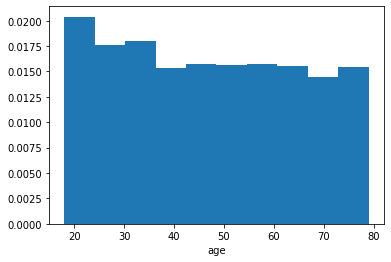

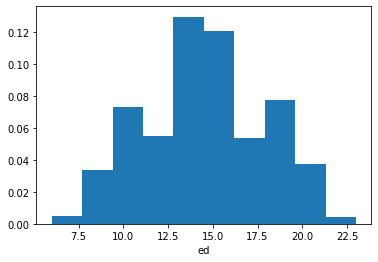

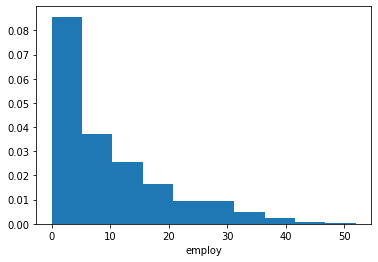

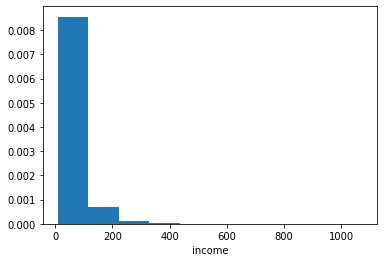

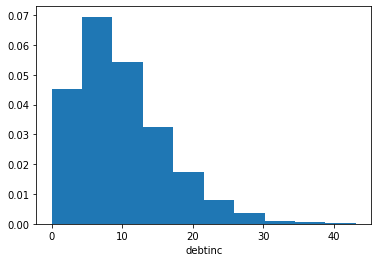

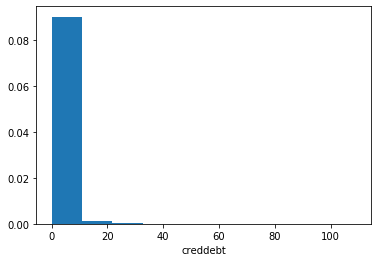

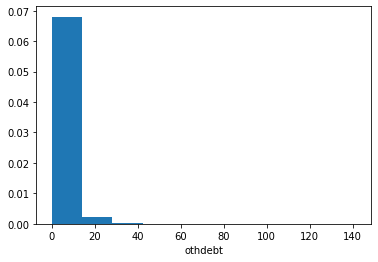

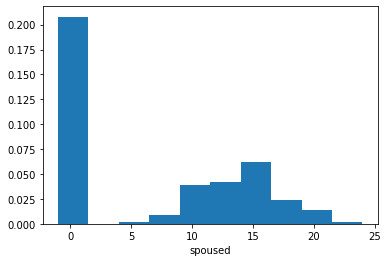

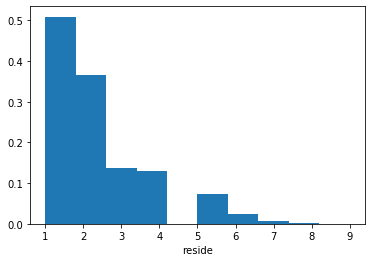

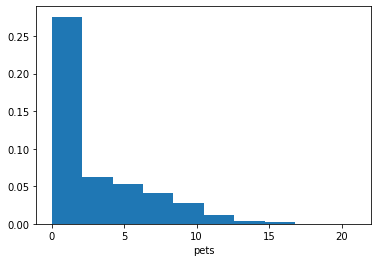

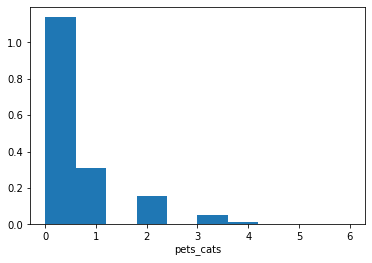

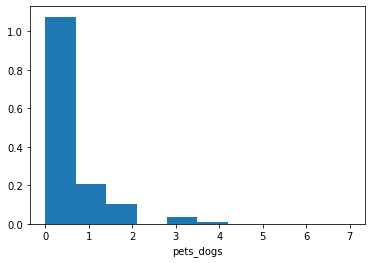

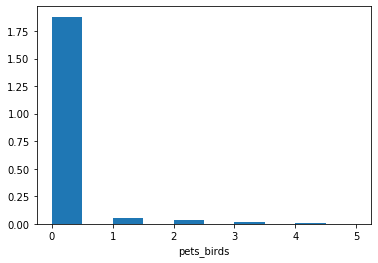

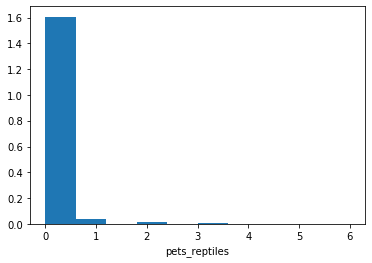

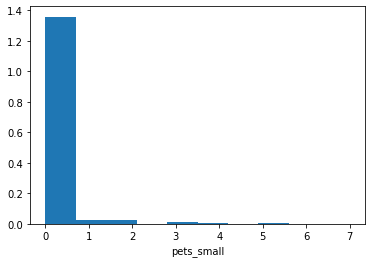

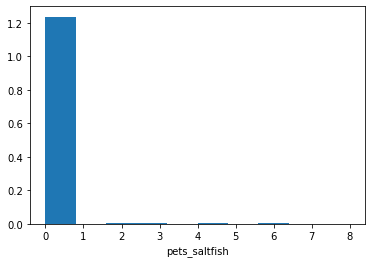

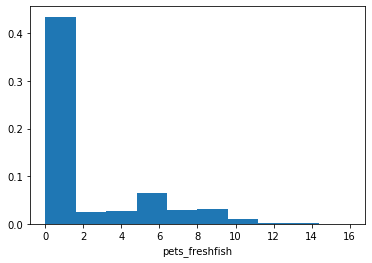

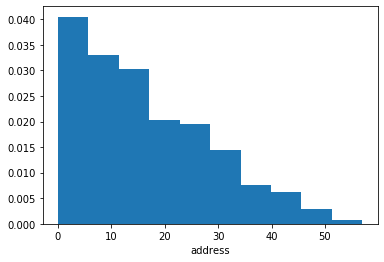

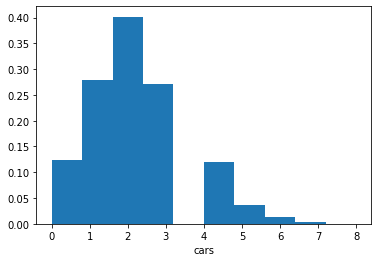

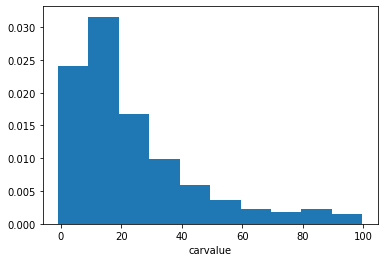

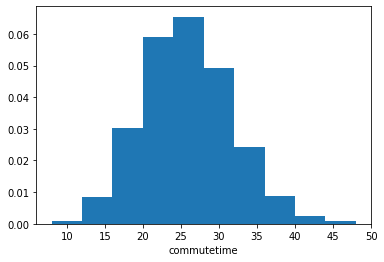

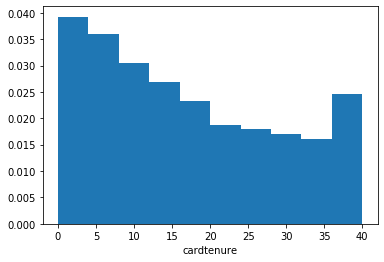

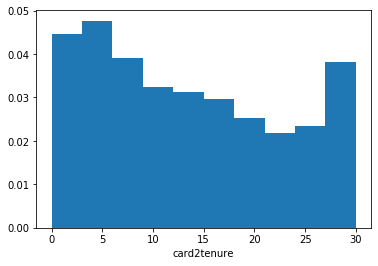

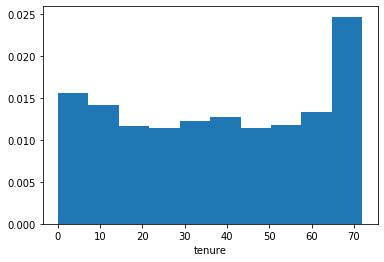

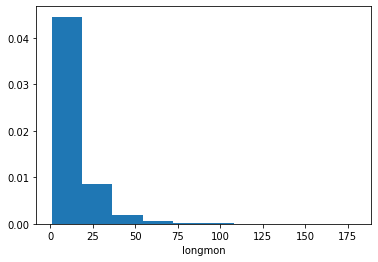

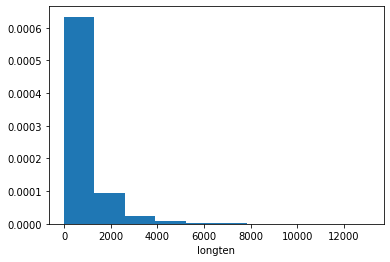

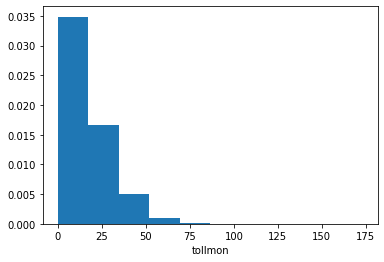

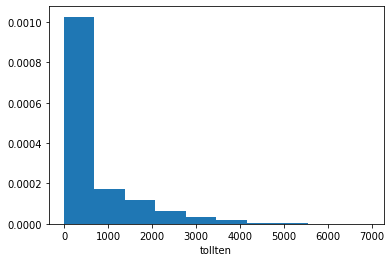

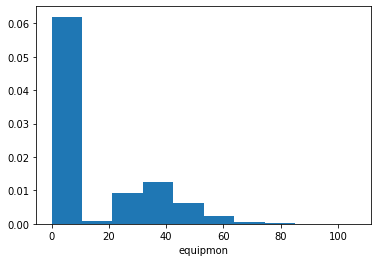

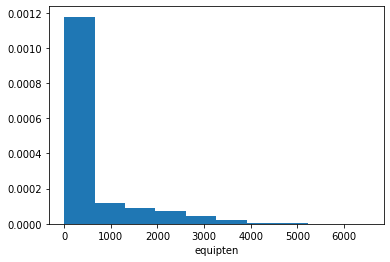

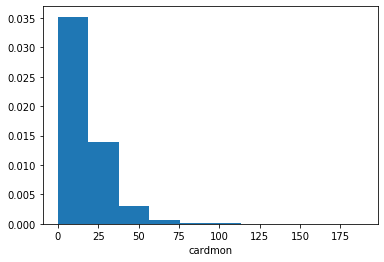

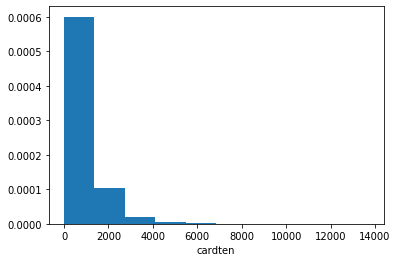

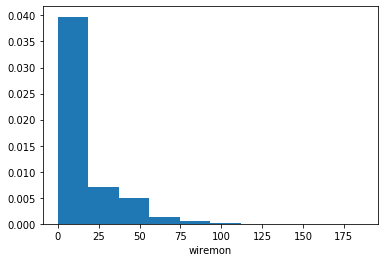

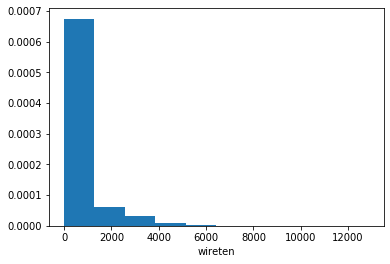

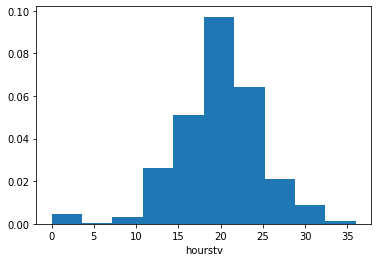

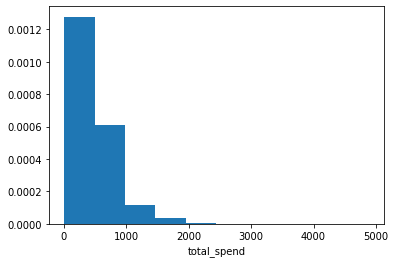

In [12]:
for var in data_num.columns:
    plt.hist(var,bins = 10, data = data_num, density=True)
    plt.xlabel(var)
    plt.show()
    

#### Outliers Treatment - Categorical data

  * Any category in categorical colum which has value less than 1% inside the data , is considered to be outlier
  * Also if there are more than 25 categories inside any column , that column should not give any proper insight in the dataset , thus considered as an irrelevent column
 
    Following is the method to extract outliers in the categorical columns

In [13]:
#check if there is any outliers in categorical variables & also if no of categories are more than 25

outlier_checklist = []
cat_morethan_25 = []
for x in data_cat.columns:                                 #loop through each column
    
    value_count = (data_cat[x].value_counts()/len(data_cat))*100 #get value count percentage for each categorical variable
    
    if len(value_count) > 25:
        cat_morethan_25.append(x)                          #check if categories are more than 25

    for i in range(len(value_count)):                      #loop through each observation of value count 
        if value_count.iloc[i] < 1:
            outlier_checklist.append(x)                    #append those variable in list which has any outliers i.e. < 1% value count
            break

            
print('Outliers:', outlier_checklist)
print()
print('More than 25 categories',cat_morethan_25)

Outliers: ['commute']

More than 25 categories []


##### as per data dictionary
'commute' variable already has been categorized into multiple dummy variables named as  'commutecar','commutemotorcycle', 'commutebus' etc..... , hence we can remove the variable 'commute' to avoid multicolliniearity

In [14]:
data_cat.drop(columns='commute', axis = 1, inplace=True)   # outlier removal

#### Outlier Treatment -  Numerical data
    
     For numerical datasets , we are capping extremes with their respective P1 and P99 percentile values

In [15]:
# define UDF to cap outliers

def outlier_capping(x):
    x = x.clip(lower = x.quantile(0.01) , upper = x.quantile(0.99))
    return x

# applying outliercapping to all numerical vars

data_num = data_num.apply(outlier_capping)

### Missing Values

In [16]:
# Numerical Dataset

In [17]:
# check which columns contain misssing values & show the number of missing values in each of those

print('number of missing values in numeric columns ')
for i in range(len(data_num.columns)):
    missing_perc = data_num[data_num.columns[i]].isnull().sum()
    
    if missing_perc != 0:
        print(data_num.columns[i], ':',missing_perc )   

number of missing values in numeric columns 
commutetime : 2
longten : 3
cardten : 2


In [18]:
# missing value imputation
def num_missing_imputation(x):
    x.fillna(x.median(),inplace = True)
    return x
 
data_num =data_num.apply(num_missing_imputation)  

In [19]:
# categorical dataset

In [20]:
# check which columns contain misssing values & show the number of missing values in each of those

print('number of missing values in numeric columns ')
for i in range(len(data_cat.columns)):
    missing_perc = data_cat[data_cat.columns[i]].isnull().sum()
    
    if missing_perc != 0:
        print(data_cat.columns[i], ':',missing_perc )   

number of missing values in numeric columns 
townsize : 2


In [21]:
# missing value imputation
def cat_missing_imputation(x):
    x.fillna(x.mode()[0], inplace = True)
    return x

data_cat = data_cat.apply(cat_missing_imputation)

In [22]:
data_cat.shape

(5000, 77)

In [23]:
# converting categorical data to numerical
data_cat = data_cat.astype('category')
data_cat_dummy = pd.get_dummies(data_cat, prefix=data_cat.columns, drop_first=True)
data_cat_dummy.head()

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0


In [24]:
# combine both categorical and numerical data into one
data_final = pd.concat([data_num,data_cat_dummy],axis = 1)

In [25]:
data_num.shape, data_cat_dummy.shape,data_final.shape

((5000, 36), (5000, 151), (5000, 187))

## Linear Regression

#### variance check

In [22]:
# remove features having coeficient of variance less than 0.05

cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x))
cv_vars =  pd.DataFrame(cv_vars).reset_index()
cv_vars.columns = ['cols','cv']
# check if variation is less than 0.05 in any of the variables
cv_vars.sort_values(by = 'cv' , ascending = True).head()

,cols,cv
104,commute_9,0.070888
101,commute_6,0.094224
97,commute_2,0.100504
102,commute_7,0.106428
121,reason_3,0.107385


none of the features has variance less than 0.05

#### Normality check

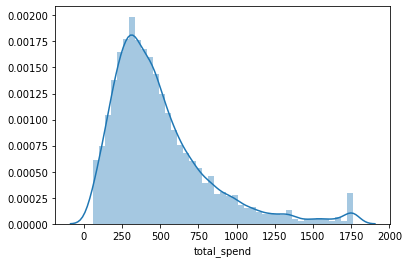

In [23]:
# check if Y variable is normally distributed

sns.distplot(data_final.total_spend)
plt.show()

total_spend is somehow positively skewed .. let's run shapiro test for confirm whether total spend is normally distributed 

###### Shapiro Test
H0 : total_spend is normally distributed

Ha : total_spend in not normally distributed 

In [24]:
shapiro_test = stats.shapiro(data_final.total_spend)
#test results
print('test_statistics',shapiro_test[0] ,';','pvalue', shapiro_test[1])

test_statistics 0.8646361827850342 ; pvalue 0.0


###### Conclusion : 
    as p value is less than 0.05 , we can reject the H0 and hence conclude that total_spend is not normally distribted

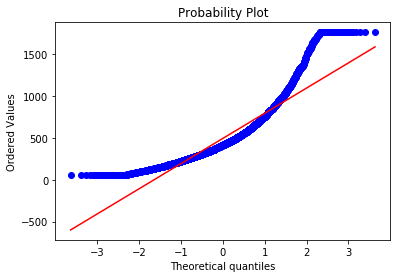

In [25]:
stats.probplot(data_final.total_spend, dist="norm", plot=plt )
plt.show()

##### applying boxcox technique to make y variable normal

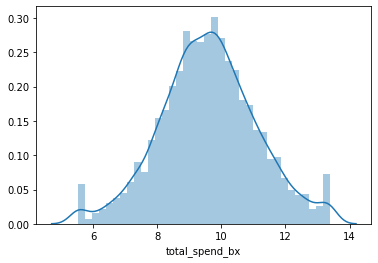

In [26]:
data_final['total_spend_bx'],fitted_lambda = stats.boxcox(data_final['total_spend'])

sns.distplot(data_final.total_spend_bx)
plt.show()

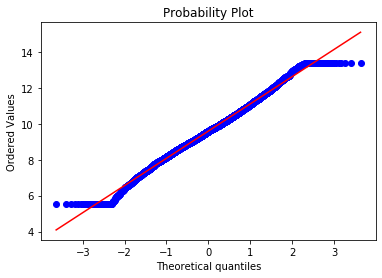

In [27]:
stats.probplot(data_final.total_spend_bx, dist="norm", plot=plt )
plt.show()

    *  the above figure shows that boxcox(Y) is normally distributed 


In [28]:
data_final.drop(columns=['total_spend'],axis = 1,inplace=True)  # dropping total spend

In [29]:
#removing decimals from some column names
data_final.rename(columns= {'townsize_2.0' : 'townsize_2','townsize_3.0' :'townsize_3', 
                            'townsize_4.0':'townsize_4','townsize_5.0' :'townsize_5'} ,inplace=True)  


#### Linearity check 

In [30]:
# all independent variables should have some linear relation with the dependent variable
# check for correlation of dependent variable with other variables
corr_matrix = data_final.corr().loc[:,'total_spend_bx'].reset_index()
corr_matrix.columns = ['X_vars', 'Corr_with_Y']
corr_matrix.Corr_with_Y = abs(corr_matrix.Corr_with_Y)
corr_matrix.sort_values(by = 'Corr_with_Y')

,X_vars,Corr_with_Y
36,region_3,0.000356
159,card2tenurecat_3,0.000831
136,cardtype_2,0.000985
41,townsize_4,0.001430
137,cardtype_3,0.001637
...,...,...
92,carcatvalue_3,0.266106
90,carcatvalue_1,0.287989
19,carvalue,0.312694
3,income,0.363695


In [31]:
# get the columns which has correlation less than 10%

len(corr_matrix.loc[corr_matrix.Corr_with_Y < 0.1, : ])


176

    majority of columns has less correlation ; thus it is better to wait for feature engineering before dropping any columns

# Feature Engineering : variable reduction

In [32]:
# first divide data into features and target(y) variable
y = data_final.total_spend_bx
features = data_final[data_final.columns.difference( ['total_spend_bx'] )]

In [33]:
y.shape, features.shape

((5000,), (5000, 195))

### 1. RFE
   
   ##### Choose how many features to select from RFE

In [34]:
n_features = []
R_square = []
RMSE_tr = []
RMSE_ts = []
for feature_num in range(10,186,10):
    lm = LinearRegression()
    #create the RFE model and select 50 attributes
    rfe = RFE(lm, n_features_to_select=feature_num)
    rfe = rfe.fit(features, y)
    RFE_features = features.columns[rfe.get_support()]
    X = features[RFE_features]
    #split
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 777)

    #ols model
    eqn = 'total_spend_bx~'+'+'.join(X_train.columns)
    ols_model = smp.ols(formula =eqn , data = data_final)
    ols_model_output = ols_model.fit()
    
    #result
    Cur_rsqr=ols_model_output.rsquared
    train_predicted = inv_boxcox(ols_model_output.predict(X_train), fitted_lambda)
    test_predicted = inv_boxcox(ols_model_output.predict(X_test), fitted_lambda)
    train_actual = inv_boxcox(y_train, fitted_lambda)
    test_actual = inv_boxcox(y_test, fitted_lambda)
    RMSE_train = np.sqrt(np.mean(np.square((train_actual-train_predicted))))
    RMSE_test = np.sqrt(np.mean(np.square((test_actual-test_predicted))))
    
    R_square.append(Cur_rsqr)
    n_features.append(feature_num)
    RMSE_tr.append(RMSE_train)
    RMSE_ts.append(RMSE_test)
    
RFE_table = pd.DataFrame({'n_features': n_features,'R_square':R_square,'RMSE_tr':RMSE_tr,'RMSE_ts':RMSE_ts})
RFE_table.columns = ['n_features','R_square','RMSE_tr','RMSE_ts']
RFE_table.sort_values(by='R_square' , ascending = False,inplace = True)
RFE_table

,n_features,R_square,RMSE_tr,RMSE_ts
17,180,0.367620,262.335387,260.465375
16,170,0.366534,262.460855,260.405611
15,160,0.361729,263.503887,261.525626
14,150,0.360627,263.702771,262.227690
13,140,0.360498,263.631769,262.237210
12,130,0.359221,264.305893,261.973766
11,120,0.358554,264.465222,262.174629
10,110,0.358036,264.547810,262.488966
9,100,0.357371,264.735931,262.608357
8,90,0.356082,265.021253,263.139738


#### Lets visualize the table on a plot for better understanding

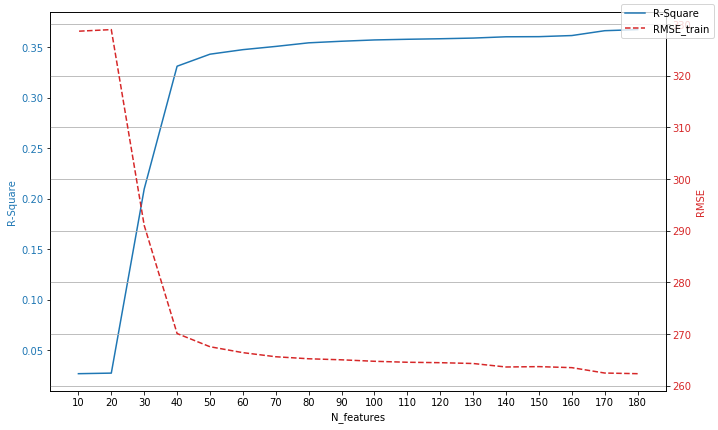

In [35]:
RFE_table.to_csv("RFE_Table.csv") # saving table output

# lets visualize the Rsquare at different features
x = RFE_table.n_features
fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)

color = 'tab:blue'
ax1.set_xlabel('N_features')
ax1.set_ylabel('R-Square', color=color)
ax1.plot(x, RFE_table.R_square, "-",color = color, label = 'R-Square')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(10,186,10))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('RMSE', color=color)
ax2.plot(x, RFE_table.RMSE_tr,"--" ,color = color, label = 'RMSE_train')
ax2.tick_params(axis='y', labelcolor=color)

plt.grid(True)
fig.legend()
fig.tight_layout() 
plt.show()# Print the coherence scores

   We chose **n_features to be 50**, as it there is not much drop in the Rsquare compared to all the features as well as RMSE is also not very high

#### Applying RFE with n_features = 80

In [99]:
#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 50 attributes
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(features, y)

In [100]:
RFE_50_cols = features.columns[rfe.get_support()]
features_rfe = features[RFE_50_cols]
features_rfe.shape

(5000, 50)

### 2. F- Regression

In [101]:
F_values, p_values  = f_regression(features_rfe, y )

In [102]:
f_reg_results = list(itertools.zip_longest(features_rfe.columns, F_values,  ['%.3f' % p for p in p_values]))
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results.sort_values(by='P_Value')

f_reg_results.to_csv("f_regression_results.csv") # saving results
f_reg_results

,Variable,F_Value,P_Value
0,carbought_0,1.219486,0.270
1,carbought_1,0.138002,0.710
2,carcatvalue_1,452.011243,0.000
3,carcatvalue_2,41.085026,0.000
4,carcatvalue_3,380.892430,0.000
5,card2_2,28.745731,0.000
6,card2_3,36.983558,0.000
7,card2_4,18.457956,0.000
8,card2_5,15.727325,0.000
9,card2tenurecat_3,0.003449,0.953


###### extracting columns which has pvalue less than 5%

In [103]:
f_reg_results.P_Value = f_reg_results.P_Value.astype('float64')

# extract those variable names which has pvalue less than 0.05
f_reg_features = list(f_reg_results.loc[f_reg_results.P_Value < 0.05, 'Variable'])

In [104]:
print(f_reg_features)
print("----------------")
print(len(f_reg_features))

['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_2', 'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'card_5', 'cardtenurecat_3', 'cardtenurecat_5', 'carown_0', 'carown_1', 'commute_4', 'inccat_2', 'inccat_3', 'inccat_4', 'inccat_5', 'owndvd_1', 'ownvcr_1', 'reason_2', 'retire_1', 'spousedcat_1', 'spousedcat_4']
----------------
26


   **26** features out 195 available features have been selected best after performing feature elimination with **RFE & F-Regression**
   
   Lets eliminate more by applying VIF in all the selected features

### 3. VIF 

In [112]:
Final_list = [#'carcatvalue_1',
 'carcatvalue_2',
 'carcatvalue_3',
 'card2_2',
 'card2_3',
 'card2_4',
 'card2_5',
 'card_2',
 'card_3',
 'card_4',
 'card_5',
 'cardtenurecat_3',
 'cardtenurecat_5',
 'carown_0',
 'carown_1',
 'commute_4',
 'inccat_2',
 'inccat_3',
 'inccat_4',
 'inccat_5',
 #'owndvd_1',
 #'ownvcr_1',
 'reason_2',
 'retire_1',
 'spousedcat_1',
 'spousedcat_4']

In [113]:
X = features[Final_list] 

In [114]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("no_of_variables : " ,len(vif))
vif.sort_values(by='VIF_Factor', ascending=False)


no_of_variables :  23


,features,VIF_Factor
9,card_5,1.233329
18,inccat_5,1.029438
17,inccat_4,0.715513
20,retire_1,0.545772
0,carcatvalue_2,0.542429
6,card_2,0.393641
22,spousedcat_4,0.387393
1,carcatvalue_3,0.378749
5,card2_5,0.361788
7,card_3,0.314096


       Restricting VIF under 2 with all the above variables.
       
       lets visualize correlation among final selected 23 variables , to avoid multicolinierity issue

###### Multicolinierity check among all selected features

In [115]:
X.shape

(5000, 23)

In [116]:
def corr_check(data, max_threshold = 0.9):
    highly_correlated_cols = []
    for feature in data.columns:
        for eachcol in data.columns:
            if feature != eachcol:
                corr = (data[feature].corr(data[eachcol]))
                if abs(corr) > max_threshold:
                    highly_correlated_cols.append([feature,eachcol,corr])
    if highly_correlated_cols == []:
        return "No two columns has correlation more than given threshold"
    else:
        return highly_correlated_cols

In [117]:
# check if any two columns has abs(correlation) more than 0.9
corr_check(X)

'No two columns has correlation more than given threshold'

In [118]:
# what if we reduce threshold to 0.8
corr_check(X,max_threshold=0.8)

'No two columns has correlation more than given threshold'

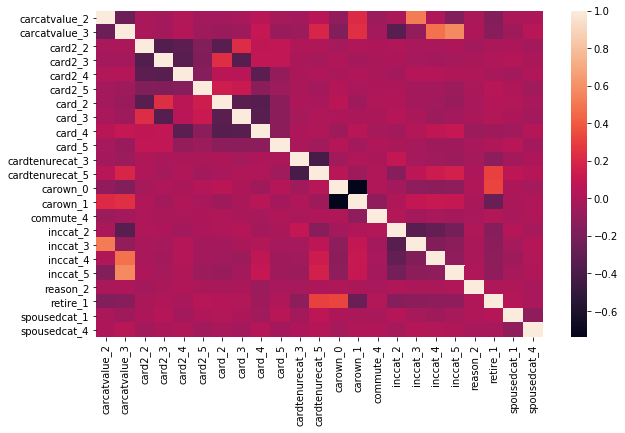

In [119]:
# lets visualize this over heatmap
plt.figure(figsize = (10,6))
sns.heatmap(X.corr())
plt.show()

  * No two X variable has too high correlation 

In [120]:
X.shape

(5000, 23)

##### Linearity check
        In this step we can once again check linearity of all the selected variable with target variable

In [121]:
def linerity_check(data, target_var, min_threshold = 0.1):
    #create correlation matrix
    least_correlated_with_Y = []
    corr_matrix = pd.concat([data,target_var],axis=1).corr()
    corr_matrix = corr_matrix.loc[:,target_var.name].reset_index()
    corr_matrix.columns = ['X_vars', 'Corr_with_Y']
    corr_matrix.Corr_with_Y = abs(corr_matrix.Corr_with_Y)
    corr_matrix.sort_values(by = 'Corr_with_Y')
    
    return corr_matrix[corr_matrix.Corr_with_Y < min_threshold]

In [122]:
least_correlated_vars = (linerity_check(X,y,0.05)) # variables which has correlation less than 5% with target variable y
print("no. of least correlated vars : " , len(least_correlated_vars))
least_correlated_vars

no. of least correlated vars :  5


,X_vars,Corr_with_Y
9,card_5,0.046158
10,cardtenurecat_3,0.033562
14,commute_4,0.031888
21,spousedcat_1,0.034862
22,spousedcat_4,0.031188


In [123]:
# dropping the 5 columns with least correlation with target variable 
X_after_linearity = X.drop(columns = least_correlated_vars.X_vars, axis=1)

### Final list of features after all feature engineering steps

In [124]:
print(X.shape)
print()
print(X.columns)

(5000, 23)

Index(['carcatvalue_2', 'carcatvalue_3', 'card2_2', 'card2_3', 'card2_4',
       'card2_5', 'card_2', 'card_3', 'card_4', 'card_5', 'cardtenurecat_3',
       'cardtenurecat_5', 'carown_0', 'carown_1', 'commute_4', 'inccat_2',
       'inccat_3', 'inccat_4', 'inccat_5', 'reason_2', 'retire_1',
       'spousedcat_1', 'spousedcat_4'],
      dtype='object')


     There are 23 variable selected after all feature engineering steps performed, We can go ahead with these variables to         perform model building

#### Train-Test Split

In [135]:
final_modelling_df = pd.concat([X,y],axis=1)

final_modelling_df.to_csv("final_modelling_df.csv") # saving final dataset

In [136]:
train_data , test_data = train_test_split(final_modelling_df, test_size = 0.3, random_state =1111)

train_data.shape , test_data.shape

((3500, 24), (1500, 24))

In [154]:
train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")

## Model Building 

   * ##### Linear OLS Regression

In [137]:
eqn = 'total_spend_bx~'+'+'.join(X.columns)

In [139]:
ols_model = smp.ols(formula =eqn , data = train_data)
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spend_bx   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     77.50
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          3.62e-291
Time:                        15:35:11   Log-Likelihood:                -5652.5
No. Observations:                3500   AIC:                         1.135e+04
Df Residuals:                    3476   BIC:                         1.150e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.0826      0.117     

In [152]:
#getting predicted results from the model output - inverse boxcox
train_data['actual_total_spend'] = inv_boxcox(train_data['total_spend_bx'], fitted_lambda)
test_data['actual_total_spend'] = inv_boxcox(test_data['total_spend_bx'], fitted_lambda)
train_data['pred_total_spend'] =inv_boxcox(ols_model_output.predict(train_data), fitted_lambda)
test_data['pred_total_spend'] =inv_boxcox(ols_model_output.predict(test_data), fitted_lambda)

##### Calculate scores for ols model ouput

In [224]:
def regression_scores(original_value, predicted_value):
    MAPE_score = np.mean(np.abs((original_value-predicted_value)/original_value))
    MSE_score = metrics.mean_squared_error(original_value, predicted_value)
    RMSE_score = np.sqrt(MSE_score)
    R2_score = metrics.r2_score(original_value, predicted_value)
    return [MAPE_score,MSE_score,RMSE_score, R2_score]

In [225]:
ols_scores_train = regression_scores(train_data.actual_total_spend,train_data.pred_total_spend)
ols_scores_train

[0.4768456254932199, 68628.00434300092, 261.9694721584958, 0.31655125061262024]

In [226]:
ols_scores_test = regression_scores(test_data.actual_total_spend,test_data.pred_total_spend)
ols_scores_test

[0.5019155179901089, 80696.43913066316, 284.07118673083187, 0.2850607410215691]

## Model Building
  * ##### Machine Learning Techniques
          Lets try different machine learning techniques on the same datasets to compare scores with OLS regression

In [171]:
# create dataset with final variable for machine learning

X_train, X_test, y_train,y_test = train_test_split(X,(inv_boxcox(y,fitted_lambda)),  #we dont have assumption of normality in ML
                                                   test_size=0.3 , random_state = 111)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 23), (1500, 23), (3500,), (1500,))

In [172]:
from sklearn.model_selection import GridSearchCV

In [175]:
def best_model_gridcv(estimator , param_grid , cv = 3 , X_train =X_train , X_test= X_test, y_train = y_train):  
    
    model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv,n_jobs=-1)
    model = model.fit(X_train,y_train)
    
    best_model = model.best_estimator_
    
    pred_train = best_model.predict(X_train)
    pred_test = best_model.predict(X_test)
    
    return [best_model,pred_train,pred_test] # output will be best_model_output and predicted value of train & test data

##### 1. KNN 

In [177]:
#KNN required scaled dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [178]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
# define parameter grid for KNN
param_grid = [{'n_neighbors': [5,9,11,15]}]

In [180]:
knn_model_output , pred_train_knn, pred_test_knn = best_model_gridcv(estimator=KNeighborsRegressor(),
                                                                     param_grid=param_grid,
                                                                    X_train=X_train_scaled,
                                                                    X_test=X_test_scaled)

In [228]:
# getting scores using earlier created udf
knn_scores_train = regression_scores(y_train,pred_train_knn)
knn_scores_test = regression_scores(y_test,pred_test_knn)
print("train_scores : ",knn_scores_train ,"\ntest_scores : ", knn_scores_test )

train_scores :  [0.5673270209481214, 72849.6151829861, 269.9066786557645, 0.31386974900441167] 
test_scores :  [0.638349889273864, 79519.83716050436, 281.99261898231373, 0.19823378156342464]


In [187]:
joblib.dump(knn_model_output,"knn_model_output.pkl") # saving model output

['knn_model_output.pkl']

##### 2. Decision Trees 

In [191]:
param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}

In [192]:
dt_model_output , pred_train_dt, pred_test_dt = best_model_gridcv(estimator=DecisionTreeRegressor(),
                                                                     param_grid=param_grid,
                                                                    X_train=X_train,
                                                                    X_test=X_test)

In [229]:
dt_scores_train = regression_scores(y_train,pred_train_dt)
dt_scores_test = regression_scores(y_test,pred_test_dt)
print("train_scores : ",dt_scores_train ,"\ntest_scores : ", dt_scores_test )

train_scores :  [0.6663341920951045, 87985.11223538156, 296.6228451002747, 0.17131686982422822] 
test_scores :  [0.7057967420748176, 87918.77623531852, 296.511005251607, 0.11355069038328391]


In [196]:
joblib.dump(dt_model_output,"dt_model_output.pkl") # saving model output

['dt_model_output.pkl']

###### 3. Random Forest

In [199]:
param_grid = {'n_estimators': [50,80,100,150,200,300],
               'max_depth':[4,6,8,10]}

In [200]:
rf_model_output , pred_train_rf, pred_test_rf = best_model_gridcv(estimator=RandomForestRegressor(),
                                                                     param_grid=param_grid)

In [230]:
rf_scores_train = regression_scores(y_train,pred_train_rf)
rf_scores_test = regression_scores(y_test,pred_test_rf)
print("train_scores : ",rf_scores_train ,"\ntest_scores : ", rf_scores_test )

train_scores :  [0.551287168089666, 63029.393099057015, 251.05655358714898, 0.4063609917701294] 
test_scores :  [0.6252677637953074, 76647.24036743383, 276.8523801007205, 0.22719700822628208]


In [205]:
joblib.dump(rf_model_output,"rf_model_output.pkl") # saving model output

['rf_model_output.pkl']

###### 4. Gradient Boost

In [208]:
param_grid = {'n_estimators': [60,100,150,200,300],
               'max_depth':[2,4,6,8],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

In [209]:
gbm_model_output , pred_train_gbm, pred_test_gbm = best_model_gridcv(estimator=GradientBoostingRegressor(),
                                                                     param_grid=param_grid)

In [231]:
gbm_scores_train = regression_scores(y_train,pred_train_gbm)
gbm_scores_test = regression_scores(y_test,pred_test_gbm)
print("train_scores : ",gbm_scores_train ,"\ntest_scores : ", gbm_scores_test )

train_scores :  [0.5566428770860086, 69391.15188241187, 263.4220034135567, 0.3464431028446696] 
test_scores :  [0.5859963124490893, 68963.26363096478, 262.60857493799546, 0.3046714245548571]


In [211]:
joblib.dump(gbm_model_output,"gbm_model_output.pkl") # saving model output

['gbm_model_output.pkl']

##### 5. SVM

In [214]:
param_grid = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]


In [215]:
svr_model_output , pred_train_svr, pred_test_svr = best_model_gridcv(estimator=SVR(),
                                                                     param_grid=param_grid)

In [232]:
svr_scores_train = regression_scores(y_train,pred_train_svr)
svr_scores_test = regression_scores(y_test,pred_test_svr)
print("train_scores : ",svr_scores_train ,"\ntest_scores : ", svr_scores_test )

train_scores :  [0.4863313159092339, 75194.84509620111, 274.2167848549777, 0.2917813249962038] 
test_scores :  [0.5047466568978033, 71092.71957990553, 266.63218031570295, 0.28320098517174563]


In [217]:
joblib.dump(svr_model_output,"svr_model_output.pkl") # saving model output

['svr_model_output.pkl']

* ### lets compare all model scores 

      on both Train(development) dataset & Test(Validation) dataset

In [236]:
train_scores = [ols_scores_train,knn_scores_train,dt_scores_train,rf_scores_train,gbm_scores_train,svr_scores_train]
test_scores = [ols_scores_test,knn_scores_test,dt_scores_test,rf_scores_test,gbm_scores_test,svr_scores_test]
model_names = ['Linear Regression','KNN','Decision Trees','Random Forest', 'Gradient Boost' , 'Support Vector']

def get_scores_table(List_of_scores):
    MAPE = []
    MSE = []
    RMSE = []
    r_square = []
    for model_score in List_of_scores:
        MAPE.append(model_score[0])
        MSE.append(model_score[1])
        RMSE.append(model_score[2])
        r_square.append(model_score[3])
        
    return pd.DataFrame({'Models':model_names, 'MAPE':MAPE ,'MSE':MSE,'RMSE':RMSE, 'R_Square':r_square})

In [238]:
Scores_development = get_scores_table(train_scores)
Scores_development.to_csv("development_scores_df.csv")
Scores_development

,Models,MAPE,MSE,RMSE,R_Square
0,Linear Regression,0.476846,68628.004343,261.969472,0.316551
1,KNN,0.567327,72849.615183,269.906679,0.313870
2,Decision Trees,0.666334,87985.112235,296.622845,0.171317
3,Random Forest,0.551287,63029.393099,251.056554,0.406361
4,Gradient Boost,0.556643,69391.151882,263.422003,0.346443
5,Support Vector,0.486331,75194.845096,274.216785,0.291781


In [240]:
Scores_validation = get_scores_table(test_scores)
Scores_validation.to_csv("Validation_scores_df.csv")
Scores_validation

,Models,MAPE,MSE,RMSE,R_Square
0,Linear Regression,0.501916,80696.439131,284.071187,0.285061
1,KNN,0.638350,79519.837161,281.992619,0.198234
2,Decision Trees,0.705797,87918.776235,296.511005,0.113551
3,Random Forest,0.625268,76647.240367,276.852380,0.227197
4,Gradient Boost,0.585996,68963.263631,262.608575,0.304671
5,Support Vector,0.504747,71092.719580,266.632180,0.283201


    The ideal model should give least error and higher rsquare
    
    lets visualize the results

In [272]:
def scores_plot(df , x, y1_axis , y2_axis, title):
    x = df[x]
    fig, ax1 = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(10)

    color = 'tab:blue'
    ax1.set_xlabel('Models')
    ax1.set_ylabel(df[y1_axis].name, color=color)
    ax1.plot(x, df[y1_axis], "-",color = color, label = df[y1_axis].name)
    #ax1.axhline(y=ols_model_line, color='darkblue', linestyle='--')   ## horizontal line of OLS model Rsquare on the training dataset
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax2.set_ylabel(df[y2_axis].name, color=color)
    ax2.plot(x, df[y2_axis],"--" ,color = color, label = df[y2_axis].name)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(title)
    plt.grid(True)
    fig.legend()
    fig.tight_layout() 
    plt.show()

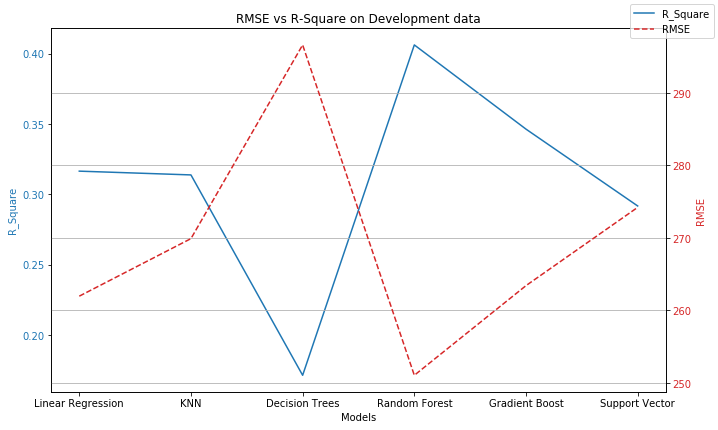

In [274]:
scores_plot(Scores_development,'Models','R_Square','RMSE',title="RMSE vs R-Square on Development data")

            * Random Forest Regressor is giving best results with highest R_square and least RMSE score on development data

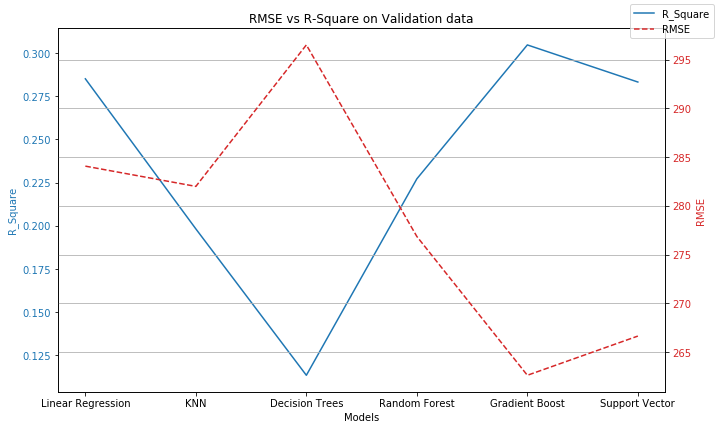

In [276]:
scores_plot(Scores_validation,'Models','R_Square','RMSE',title="RMSE vs R-Square on Validation data")

           * Gradient Boost Regressor is giving best results with highest R_square and least RMSE score on Validation data
          
  *  ######  Random Forest is giving not very significant result in the validation dataset thus considering overfitting ... hence considered **GBM** as the best Regressor

---------------------------------------------------------------------------------
## Model Validation


  * ###  Linear Regression Assumption Check
              Residuals of Linear model should follow normal distribution 
    

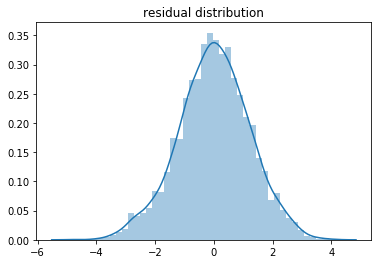

In [282]:
#Checking Errors distribution
plt.title("residual distribution")
sns.distplot(ols_model_output.resid)
plt.show()

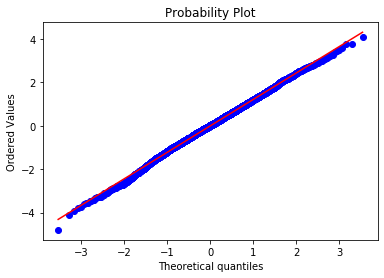

In [283]:
stats.probplot(ols_model_output.resid, dist="norm", plot=plt )
plt.show()

        Both above plots shows that residuals are normally distrbuted 


  * ###  linearity between actual and predicted
              Actual data & Predicted data should follow linear relationship

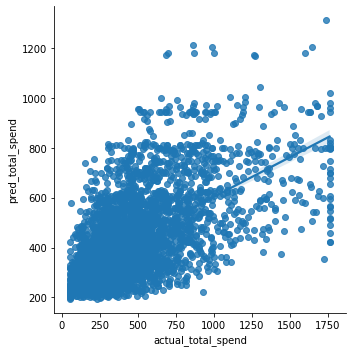

In [288]:
sns.lmplot(x='actual_total_spend', y='pred_total_spend', data=train_data)
plt.show()

                predicted results has linear relationship with actual results

 -----------------------------------------------------------------------
   *  ###  Decile Analysis


In [290]:
train_data['Deciles']=pd.qcut(train_data['pred_total_spend'],10, labels=False)
test_data['Deciles']=pd.qcut(test_data['pred_total_spend'],10, labels=False)

In [291]:
# decile analysis train
Predicted_avg = train_data[['Deciles','pred_total_spend']].groupby(train_data.Deciles).mean().sort_index(ascending=False)['pred_total_spend']
Actual_avg = train_data[['Deciles','actual_total_spend']].groupby(train_data.Deciles).mean().sort_index(ascending=False)['actual_total_spend']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

,pred_total_spend,actual_total_spend
Deciles,,
9,819.222972,897.862996
8,624.049556,688.369284
7,534.262454,586.969812
6,472.039552,524.080299
5,423.588460,464.710125
4,380.642310,419.038246
3,340.153932,393.304656
2,313.049641,347.205315
1,281.233940,319.828194


In [292]:
# Decile Analysis for test data
Predicted_avg = test_data[['Deciles','pred_total_spend']].groupby(test_data.Deciles).mean().sort_index(ascending=False)['pred_total_spend']
Actual_avg = test_data[['Deciles','actual_total_spend']].groupby(test_data.Deciles).mean().sort_index(ascending=False)['actual_total_spend']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test

,pred_total_spend,actual_total_spend
Deciles,,
9,816.070135,916.689859
8,611.371262,694.674159
7,532.423062,600.266995
6,467.676993,560.453365
5,415.366373,509.703283
4,373.434295,406.885317
3,336.385715,378.613029
2,311.045738,334.850199
1,278.054735,322.851568


In [293]:
#Exporting Decile analysis in csv for further analysis
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

------------------------------------------------------------------
### Predict total spend based on OLS model results

         Following is the final equation dervied from the OLS model results      

In [340]:
eqn = ""
for ind in range(len(ols_model_output.params)):
    if ind != 0:
        if (ols_model_output.params[ind] > 0):
            eqn = eqn + "+" +  str(ols_model_output.params[ind]) + "*" + ols_model_output.params.index[ind]
        else:
            eqn = eqn + str(ols_model_output.params[ind]) + "*" + ols_model_output.params.index[ind]
    
final_eqn = print(eqn + '+'+str(ols_model_output.params[0])) #adding intercept

+0.1289417445997489*carcatvalue_2+0.1924311616238476*carcatvalue_3-0.9542247716301664*card2_2-0.9094950623567607*card2_3-1.0063798557683572*card2_4-0.6932913185621515*card2_5-1.3415761346074162*card_2-1.4076304320118647*card_3-1.6172205141156264*card_4-1.0510754069770631*card_5-0.0687928269174283*cardtenurecat_3+0.034500435133878515*cardtenurecat_5-0.263996799379273*carown_0-0.11275630095850697*carown_1-0.07046337092576256*commute_4+0.3832113347112339*inccat_2+0.7326230709366569*inccat_3+1.0207169072476747*inccat_4+1.456655707926923*inccat_5+0.6056800473418995*reason_2-0.344770482998056*retire_1-0.02102423346631989*spousedcat_1-0.020272866575350622*spousedcat_4+11.082557770699424


In [345]:
ols_model_params = ols_model_output.params.reset_index()
ols_model_params.columns = ['column', 'coeficient']
ols_model_params.to_csv("ols_model_params.csv")  # the table will be used to create predicting tool in excel

In [ ]:
# final equation
#0.1289417445997489*carcatvalue_2+0.1924311616238476*carcatvalue_3-0.9542247716301664*card2_2-0.9094950623567607*card2_3
#-1.0063798557683572*card2_4-0.6932913185621515*card2_5-1.3415761346074162*card_2-1.4076304320118647*card_3
#-1.6172205141156264*card_4-1.0510754069770631*card_5-0.0687928269174283*cardtenurecat_3+0.034500435133878515*cardtenurecat_5
#-0.263996799379273*carown_0-0.11275630095850697*carown_1-0.07046337092576256*commute_4+0.3832113347112339*inccat_2+
#0.7326230709366569*inccat_3+1.0207169072476747*inccat_4+1.456655707926923*inccat_5+0.6056800473418995*reason_2
#-0.344770482998056*retire_1-0.02102423346631989*spousedcat_1-0.020272866575350622*spousedcat_4+11.082557770699424

------------------------------------------------------------------------------------------------

## Feature Importance :

            Identifying Key Drivers for Spend of the customers

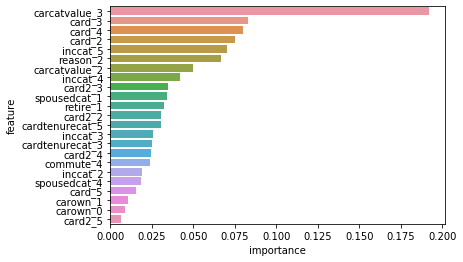

In [316]:
# Ranking based on ML output
indices = np.argsort(rf_model_output.feature_importances_)[::-1]
feature_rank_rf = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
    feature_rank_rf.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rf_model_output.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank_rf )
plt.show()

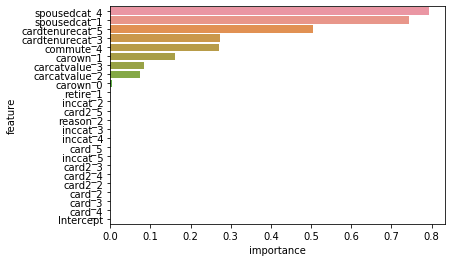

In [307]:
#ranking based on OLS output t value
feature_rank_ols = ols_model_output.pvalues.sort_values(ascending = False).reset_index()
feature_rank_ols.columns = ['feature', 'importance']
sns.barplot( y = 'feature', x = 'importance', data = feature_rank_ols )
plt.show()

In [318]:
# exporting both output data to csv for identifying key drivers
feature_rank_rf.to_csv("feature_rank_rf.csv")
feature_rank_ols.to_csv("feature_rank_ols.csv")


-------------------------------------------------------------------------------------------------
#### THE END

In [352]:
# extracting all final datasets 
train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")